In [4]:
#Import packages and set matplotlib settings
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
font = {'size'   : 16}
matplotlib.rc('font', **font)

ValueError: List of boxplot statistics and `positions` values must have same the length

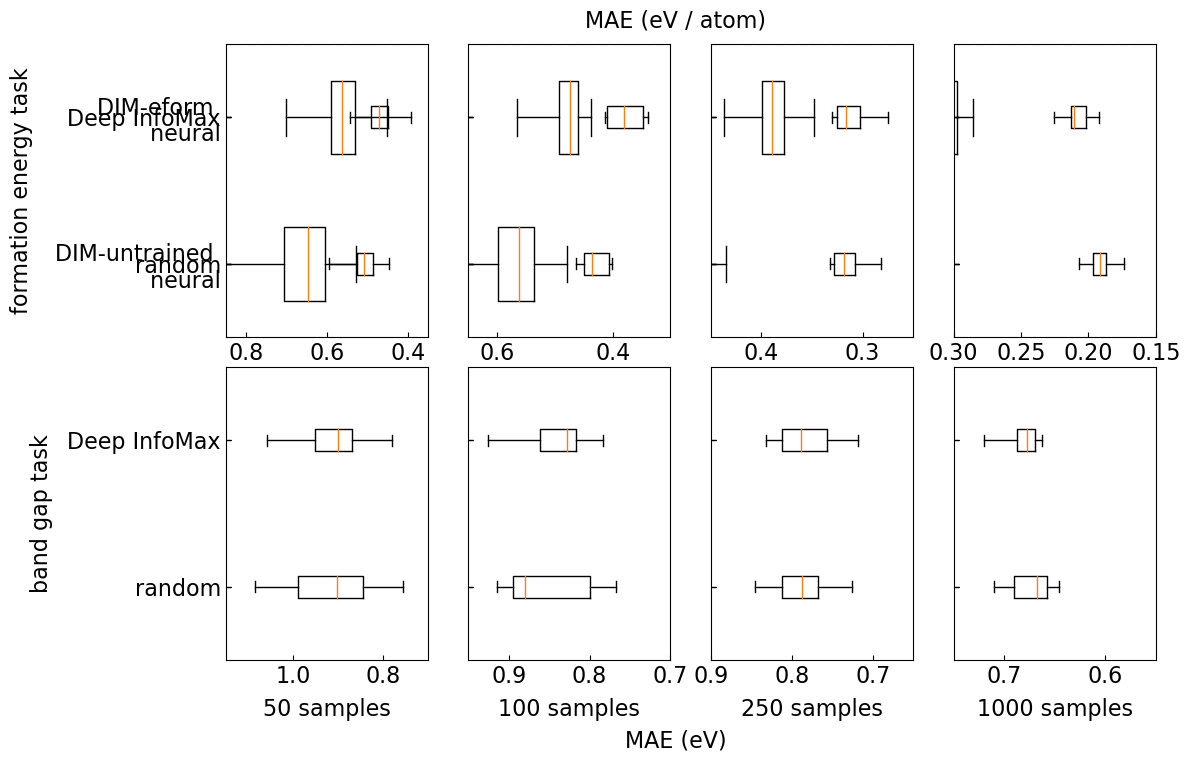

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [17]:
fig,ax = plt.subplots(2, 4, sharex=False, sharey="row",gridspec_kw={'wspace':0.2, 'hspace':0.1},figsize=(12,8))
fig.text(0.5, 0.0, "MAE (eV)", ha='center')
fig.text(0.5, 0.9, "MAE (eV / atom)", ha='center')

DownMAE = pd.read_csv("Downstream_MAEs.csv",header=None,names=["filename","MAE"])
RepMAE = pd.read_csv("Downstream_DIM.csv")
eformorbitalMAE = pd.read_csv("featurizer_pickles/eformorbital_Downstream_Featurized.csv")
eformjarvisMAE = pd.read_csv("featurizer_pickles copy/eformjarvis_Downstream_Featurized.csv")
eformxrayMAE =  pd.read_csv("featurizer_pickles/eformxray_Downstream_Featurized.csv")
Combined = pd.concat(DownMAE,RepMAE,eformorbitalMAE,eformjarvisMAE,eformxrayMAE)

box_plot_1 = [["eform_compact_dim_s50_initial_downstream_Neither_", "eform_compact_dim_s50_DIM_downstream_Neither_DIM_eform_"],["random","Deep InfoMax"],"eform_s100_transfer.png",[0.85,0.35]]
box_plot_2 = [["eform_compact_dim_s100_initial_downstream_Neither_","eform_compact_dim_s100_DIM_downstream_Neither_DIM_eform_"],["random","Deep InfoMax"],"eform_s250_transfer.png",[0.65,0.3]]
box_plot_3 = [["eform_compact_dim_s250_initial_downstream_Neither_", "eform_compact_dim_s250_DIM_downstream_Neither_DIM_eform_"],["random","Deep InfoMax"],"eform_s1000_transfer.png",[0.45,0.25]]
box_plot_4 = [["eform_compact_dim_s1000_initial_downstream_Neither_", "eform_compact_dim_s1000_DIM_downstream_Neither_DIM_eform_"],["random","Deep InfoMax"],"eform_s10000_transfer.png",[0.3,0.15]]
box_plot_queue = [box_plot_1,box_plot_2,box_plot_3,box_plot_4]

ax_i = 0
ax[0][0].set_ylabel("formation energy task",labelpad=16)
for plots in box_plot_queue:
    plt.figure()
    vectors = [DownMAE[DownMAE["filename"].str.contains(i)]["MAE"] for i in plots[0]]
    if ax_i == 0:
        ax[0][ax_i].boxplot(vectors,labels=plots[1],vert=False,whis=100000000)
    else:
        ax[0][ax_i].boxplot(vectors,labels=["",""],vert=False,whis=100000000)
    ax[0][ax_i].set_ylim(0.5,2.5)
    ax[0][ax_i].set_xlim(plots[3][0],plots[3][1])
    ax_i += 1

DownMAE = pd.read_csv("Downstream_MAEs.csv",header=None,names=["filename","MAE"])
box_plot_1 = [["egap_compact_dim_s50_initial_downstream_Neither_", "egap_compact_dim_s50_DIM_downstream_Neither_DIM_egap_"],["random","Deep InfoMax"],"eform_s50_transfer.png",[1.15,0.7],50]
box_plot_2 = [["egap_compact_dim_s100_initial_downstream_Neither_","egap_compact_dim_s100_DIM_downstream_Neither_DIM_egap_"],["random","Deep InfoMax"],"eform_s100_transfer.png",[0.95,0.7],100]
box_plot_3 = [["egap_compact_dim_s250_initial_downstream_Neither_", "egap_compact_dim_s250_DIM_downstream_Neither_DIM_egap_"],["random","Deep InfoMax"],"eform_s250_transfer.png",[0.9,0.65],250]
box_plot_4 = [["egap_compact_dim_s1000_initial_downstream_Neither_", "egap_compact_dim_s1000_DIM_downstream_Neither_DIM_egap_"],["random","Deep InfoMax"],"eform_s1000_transfer.png",[0.75,0.55],1000]
box_plot_queue = [box_plot_1,box_plot_2,box_plot_3,box_plot_4]

#fig,ax = plt.subplots(1, 4, sharex=False, sharey=True,gridspec_kw={'wspace':0.1, 'hspace':0},figsize=(12,6))
#fig.text(0.5, 0, "MAE (eV)", ha='center')

ax_i = 0
ax[1][0].set_ylabel("band gap task",labelpad=10)
for plots in box_plot_queue:
    vectors = [DownMAE[DownMAE["filename"].str.contains(i)]["MAE"] for i in plots[0]]
    if ax_i == 0:
        ax[1][ax_i].boxplot(vectors,labels=plots[1],vert=False,whis=100000000)
    else:
        ax[1][ax_i].boxplot(vectors,labels=["",""],vert=False,whis=100000000)
    ax[1][ax_i].set_ylim(0.5,2.5)
    ax[1][ax_i].set_xlim(plots[3][0],plots[3][1])
    ax[1][ax_i].set_xlabel(str(plots[4]) + " samples", labelpad=7)
    ax_i += 1

############################
#Representation learning component

ax_i = 0
for limit,name,xlim in zip([50,100,250,1000],["eformorbital_replearn_10.png","eformorbital_replearn_50.png","eformorbital_replearn_100.png","eformorbital_replearn_250.png","eformorbital_replearn_1000.png","eformorbital_replearn_10000.png"],[[1.5,0.4],[1,0.4],[0.9,0.3],[0.8,0.28]]):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_eform")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_eform")]

    if ax_i == 0:
        ax[0][ax_i].boxplot([vectors1["nn_MAE"],vectors2["nn_MAE"]],labels=["DIM-untrained \n neural","DIM-eform \n neural"],widths=0.5,vert=False,whis=100000000)
    else:
        ax[0][ax_i].boxplot([vectors1["nn_MAE"],vectors2["nn_MAE"]],labels=["",""],widths=0.5,vert=False,whis=100000000)
    [ax[0][ax_i].axhline(y, color = 'r', linestyle='--') for y in [2.5,4.5]]

    ax_i += 1

ax_i = 0
for limit,name,xlim  in zip([50,100,250,1000],["egaporbital_replearn_10.png","egaporbital_replearn_50.png","egaporbital_replearn_100.png","egaporbital_replearn_250.png","egaporbital_replearn_1000.png","egaporbital_replearn_10000.png"],[[3.2,0.7],[2.5,0.8],[1.6,0.7],[1.3,0.7]]):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_egap")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_egap")]

    if ax_i == 0:
        ax[1][ax_i].boxplot([vectors1["nn_MAE"],vectors2["nn_MAE"]],labels=["DIM-untrained \n neural","DIM-egap \n neural"],widths=0.5,vert=False,whis=100000000)
    else:
        ax[1][ax_i].boxplot([vectors1["nn_MAE"],vectors2["nn_MAE"]],labels=["",""],widths=0.5,vert=False,whis=100000000)
    [ax[1][ax_i].axhline(y, color = 'orange', linestyle='--') for y in [2.5,4.5]]
    ax[1][ax_i].set_ylim(6.5,0.5)

    ax_i += 1

fig.show()


                                              filename       MAE
378  eform_compact_dim_s250_initial_downstream_Neit...  0.308952
379  eform_compact_dim_s250_initial_downstream_Neit...  0.307942
380  eform_compact_dim_s250_initial_downstream_Neit...  0.329165
381  eform_compact_dim_s250_initial_downstream_Neit...  0.328177
382  eform_compact_dim_s250_initial_downstream_Neit...  0.330667
383  eform_compact_dim_s250_initial_downstream_Neit...  0.312210
384  eform_compact_dim_s250_initial_downstream_Neit...  0.325065
385  eform_compact_dim_s250_initial_downstream_Neit...  0.325347
386  eform_compact_dim_s250_initial_downstream_Neit...  0.301044
387  eform_compact_dim_s250_initial_downstream_Neit...  0.304379
388  eform_compact_dim_s250_initial_downstream_Neit...  0.332154
389  eform_compact_dim_s250_initial_downstream_Neit...  0.281809
[413    0.518004
414    0.585509
415    0.478142
416    0.507792
417    0.506623
418    0.507798
419    0.525103
420    0.594789
421    0.489878
422    0.5

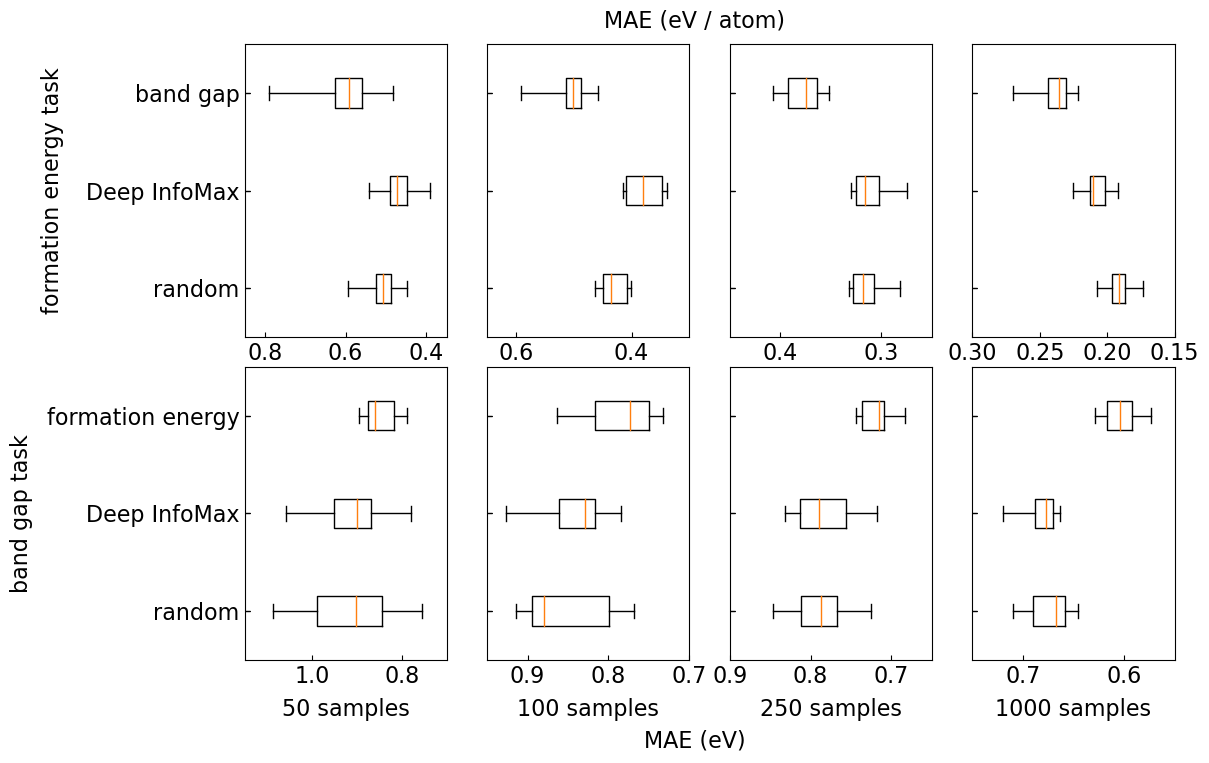

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

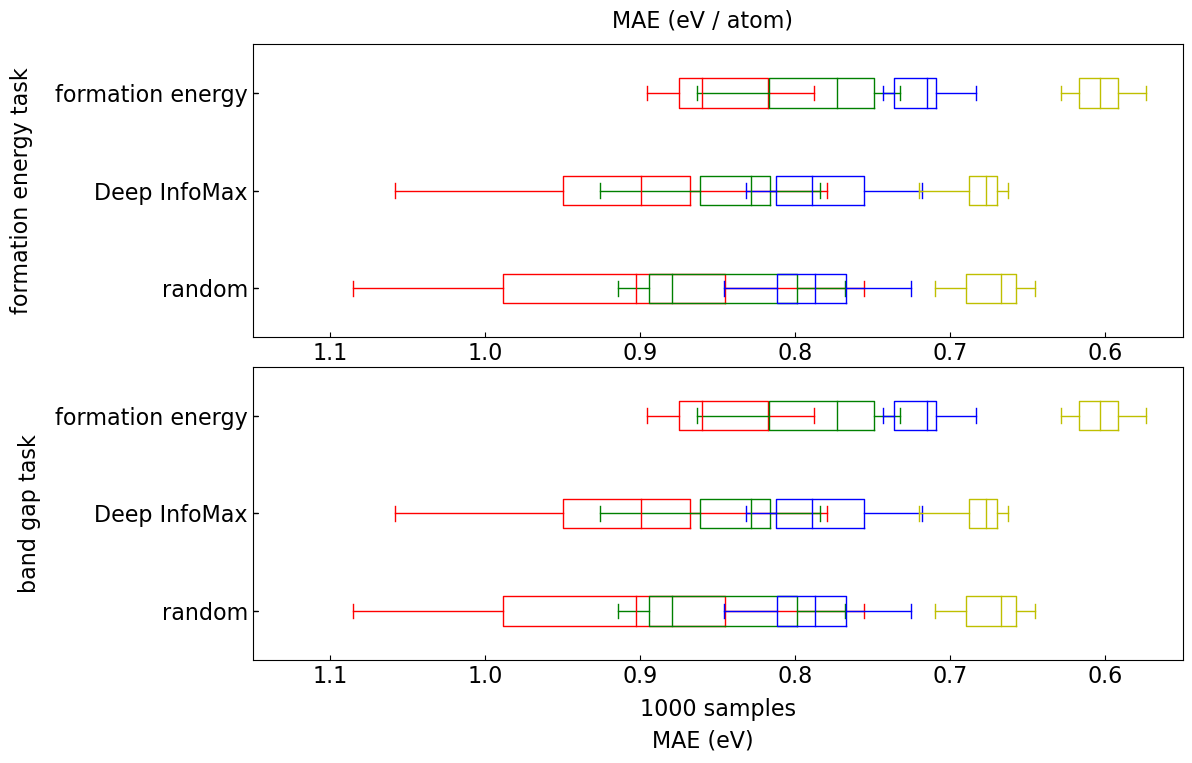

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [5]:
DownMAE = pd.read_csv("Downstream_MAEs.csv",header=None,names=["filename","MAE"])
print(DownMAE[DownMAE["filename"].str.contains("eform_compact_dim_s250_initial_downstream_Neither")])

box_plot_1 = [["eform_compact_dim_s50_initial_downstream_Neither_", "eform_compact_dim_s50_DIM_downstream_Neither_DIM_eform_", "eform_compact_dim_s50_DIM_downstream_Neither_Supervised_egap_"],["random","Deep InfoMax","band gap"],"eform_s100_transfer.png",[0.85,0.35]]
box_plot_2 = [["eform_compact_dim_s100_initial_downstream_Neither_","eform_compact_dim_s100_DIM_downstream_Neither_DIM_eform_","eform_compact_dim_s100_DIM_downstream_Neither_Supervised_egap_"],["random","Deep InfoMax","band gap"],"eform_s250_transfer.png",[0.65,0.3]]
box_plot_3 = [["eform_compact_dim_s250_initial_downstream_Neither_", "eform_compact_dim_s250_DIM_downstream_Neither_DIM_eform_", "eform_compact_dim_s250_DIM_downstream_Neither_Supervised_egap_"],["random","Deep InfoMax","band gap"],"eform_s1000_transfer.png",[0.45,0.25]]
box_plot_4 = [["eform_compact_dim_s1000_initial_downstream_Neither_", "eform_compact_dim_s1000_DIM_downstream_Neither_DIM_eform_", "eform_compact_dim_s1000_DIM_downstream_Neither_Supervised_egap_"],["random","Deep InfoMax","band gap"],"eform_s10000_transfer.png",[0.3,0.15]]
box_plot_queue = [box_plot_1,box_plot_2,box_plot_3,box_plot_4]

fig,ax = plt.subplots(2, 4, sharex=False, sharey="row",gridspec_kw={'wspace':0.2, 'hspace':0.1},figsize=(12,8))
fig.text(0.5, 0.0, "MAE (eV)", ha='center')
fig.text(0.5, 0.9, "MAE (eV / atom)", ha='center')

ax_i = 0
ax[0][0].set_ylabel("formation energy task",labelpad=16)
for plots in box_plot_queue:
    plt.figure()
    vectors = [DownMAE[DownMAE["filename"].str.contains(i)]["MAE"] for i in plots[0]]
    print(vectors)
    if ax_i == 0:
        ax[0][ax_i].boxplot(vectors,labels=plots[1],vert=False,whis=100000000)
    else:
        ax[0][ax_i].boxplot(vectors,labels=["","",""],vert=False,whis=100000000)
    ax[0][ax_i].set_ylim(0.5,3.5)
    ax[0][ax_i].set_xlim(plots[3][0],plots[3][1])
    fig.savefig("figure_eform_transfer.png")
    ax_i += 1
    fig.show()

DownMAE = pd.read_csv("Downstream_MAEs.csv",header=None,names=["filename","MAE"])
box_plot_1 = [["egap_compact_dim_s50_initial_downstream_Neither_", "egap_compact_dim_s50_DIM_downstream_Neither_DIM_egap_", "egap_compact_dim_s50_DIM_downstream_Neither_Supervised_eform_"],["random","Deep InfoMax","formation energy"],"eform_s50_transfer.png",[1.15,0.7],50]
box_plot_2 = [["egap_compact_dim_s100_initial_downstream_Neither_","egap_compact_dim_s100_DIM_downstream_Neither_DIM_egap_","egap_compact_dim_s100_DIM_downstream_Neither_Supervised_eform_"],["random","Deep InfoMax","formation energy"],"eform_s100_transfer.png",[0.95,0.7],100]
box_plot_3 = [["egap_compact_dim_s250_initial_downstream_Neither_", "egap_compact_dim_s250_DIM_downstream_Neither_DIM_egap_", "egap_compact_dim_s250_DIM_downstream_Neither_Supervised_eform_"],["random","Deep InfoMax","formation energy"],"eform_s250_transfer.png",[0.9,0.65],250]
box_plot_4 = [["egap_compact_dim_s1000_initial_downstream_Neither_", "egap_compact_dim_s1000_DIM_downstream_Neither_DIM_egap_", "egap_compact_dim_s1000_DIM_downstream_Neither_Supervised_eform_"],["random","Deep InfoMax","formation energy"],"eform_s1000_transfer.png",[0.75,0.55],1000]
box_plot_queue = [box_plot_1,box_plot_2,box_plot_3,box_plot_4]

#fig,ax = plt.subplots(1, 4, sharex=False, sharey=True,gridspec_kw={'wspace':0.1, 'hspace':0},figsize=(12,6))
#fig.text(0.5, 0, "MAE (eV)", ha='center')

ax_i = 0
ax[1][0].set_ylabel("band gap task",labelpad=10)
for plots in box_plot_queue:
    vectors = [DownMAE[DownMAE["filename"].str.contains(i)]["MAE"] for i in plots[0]]
    print(vectors)
    if ax_i == 0:
        ax[1][ax_i].boxplot(vectors,labels=plots[1],vert=False,whis=100000000)
    else:
        ax[1][ax_i].boxplot(vectors,labels=["","",""],vert=False,whis=100000000)
    ax[1][ax_i].set_ylim(0.5,3.5)
    ax[1][ax_i].set_xlim(plots[3][0],plots[3][1])
    ax[1][ax_i].set_xlabel(str(plots[4]) + " samples", labelpad=7)
    fig.savefig("figure_transfer.png",bbox_inches="tight")
    ax_i += 1
    fig.show()

fig,ax = plt.subplots(2, 1, sharex=False, sharey="row",gridspec_kw={'wspace':0.2, 'hspace':0.1},figsize=(12,8))
fig.text(0.5, 0.0, "MAE (eV)", ha='center')
fig.text(0.5, 0.9, "MAE (eV / atom)", ha='center')

ax_i = 0
ax[0].set_ylabel("formation energy task",labelpad=16)
colors = ["r","g","b","y"]
for plots,color in zip(box_plot_queue,colors):
    plt.figure()
    vectors = [DownMAE[DownMAE["filename"].str.contains(i)]["MAE"] for i in plots[0]]
    print(vectors)
    if ax_i == 0:
        box = ax[0].boxplot(vectors,labels=plots[1],vert=False,whis=100000000)
    else:
        box = ax[0].boxplot(vectors,labels=["","",""],vert=False,whis=100000000)
    for _,line_list in box.items():
        for line in line_list:
            line.set_color(color)
    ax[0].set_ylim(0.5,3.5)
    ax[0].set_xlim(1.15,0.55)
    fig.savefig("figure_eform_transfer.png")
    ax_i += 1
    fig.show()

DownMAE = pd.read_csv("Downstream_MAEs.csv",header=None,names=["filename","MAE"])
box_plot_1 = [["egap_compact_dim_s50_initial_downstream_Neither_", "egap_compact_dim_s50_DIM_downstream_Neither_DIM_egap_", "egap_compact_dim_s50_DIM_downstream_Neither_Supervised_eform_"],["random","Deep InfoMax","formation energy"],"eform_s50_transfer.png",[1.15,0.7],50]
box_plot_2 = [["egap_compact_dim_s100_initial_downstream_Neither_","egap_compact_dim_s100_DIM_downstream_Neither_DIM_egap_","egap_compact_dim_s100_DIM_downstream_Neither_Supervised_eform_"],["random","Deep InfoMax","formation energy"],"eform_s100_transfer.png",[0.95,0.7],100]
box_plot_3 = [["egap_compact_dim_s250_initial_downstream_Neither_", "egap_compact_dim_s250_DIM_downstream_Neither_DIM_egap_", "egap_compact_dim_s250_DIM_downstream_Neither_Supervised_eform_"],["random","Deep InfoMax","formation energy"],"eform_s250_transfer.png",[0.9,0.65],250]
box_plot_4 = [["egap_compact_dim_s1000_initial_downstream_Neither_", "egap_compact_dim_s1000_DIM_downstream_Neither_DIM_egap_", "egap_compact_dim_s1000_DIM_downstream_Neither_Supervised_eform_"],["random","Deep InfoMax","formation energy"],"eform_s1000_transfer.png",[0.75,0.55],1000]
box_plot_queue = [box_plot_1,box_plot_2,box_plot_3,box_plot_4]

#fig,ax = plt.subplots(1, 4, sharex=False, sharey=True,gridspec_kw={'wspace':0.1, 'hspace':0},figsize=(12,6))
#fig.text(0.5, 0, "MAE (eV)", ha='center')

ax_i = 0
ax[1].set_ylabel("band gap task",labelpad=10)
colors = ["r","g","b","y"]
for plots,color in zip(box_plot_queue,colors):
    vectors = [DownMAE[DownMAE["filename"].str.contains(i)]["MAE"] for i in plots[0]]
    print(vectors)
    if ax_i == 0:
        box = ax[1].boxplot(vectors,labels=plots[1],vert=False,whis=100000000)
    else:
        box = ax[1].boxplot(vectors,labels=["","",""],vert=False,whis=100000000)
    for _,line_list in box.items():
            for line in line_list:
                line.set_color(color)
    ax[1].set_ylim(0.5,3.5)
    ax[1].set_xlim(1.15,0.55)
    ax[1].set_xlabel(str(plots[4]) + " samples", labelpad=7)
    fig.savefig("figure_transfer.png",bbox_inches="tight")
    ax_i += 1
    fig.show()



['Initial_eform' 'Initial_egap' 'nocomp_klnorm_moremultiloss_eform'
 'nocomp_klnorm_moremultiloss_egap']
0.4513201140878196 1.317156186824377
0.4375535332484114 1.21541470332103
0.3480512157799731 1.0165615259459688
0.2855389544645947 0.7229559432468634
['Initial_eform' 'Initial_egap' 'nocomp_klnorm_moremultiloss_eform'
 'nocomp_klnorm_moremultiloss_egap']


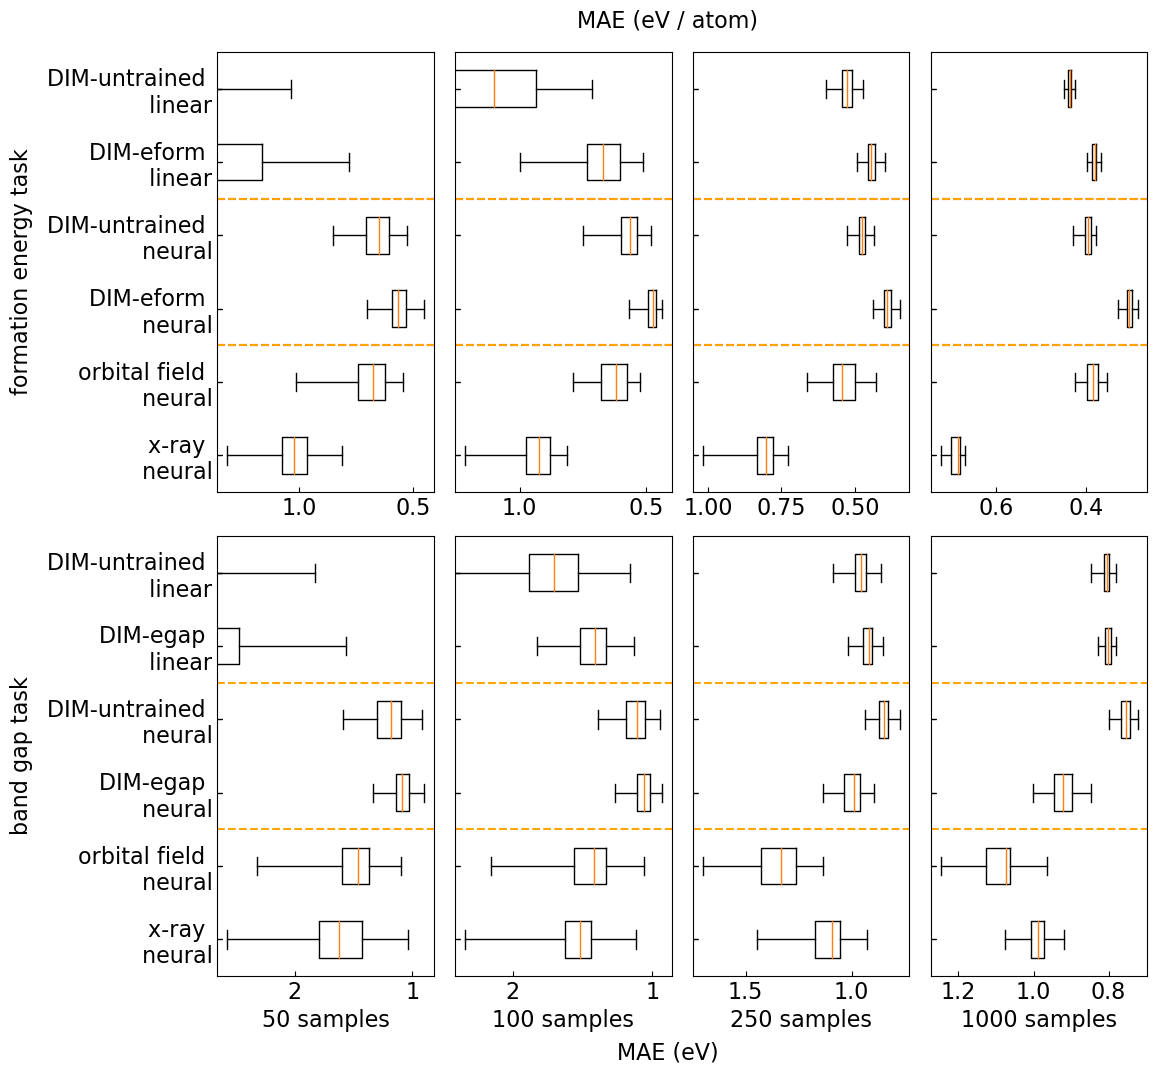

In [5]:
#normalizing kills my performance
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib
import numpy as np

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

RepMAE = pd.read_csv("Downstream_DIM.csv")
eformorbitalMAE = pd.read_csv("featurizer_pickles/eformorbital_Downstream_Featurized.csv")
eformjarvisMAE = pd.read_csv("featurizer_pickles copy/eformjarvis_Downstream_Featurized.csv")
eformxrayMAE =  pd.read_csv("featurizer_pickles/eformxray_Downstream_Featurized.csv")
print(RepMAE["model"].unique())

fig,ax = plt.subplots(2, 4, sharex=False, sharey="row",gridspec_kw={'wspace':0.1, 'hspace':0.1},figsize=(12,12))
fig.text(0.5, 0.90, "MAE (eV / atom)", ha='center')

ax_i = 0
ax[0][0].set_ylabel("formation energy task",labelpad=10)

for limit,name,xlim in zip([50,100,250,1000],["eformorbital_replearn_10.png","eformorbital_replearn_50.png","eformorbital_replearn_100.png","eformorbital_replearn_250.png","eformorbital_replearn_1000.png","eformorbital_replearn_10000.png"],[[1.5,0.4],[1,0.4],[0.9,0.3],[0.8,0.28]]):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_eform")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_eform")]
    vectors3 = eformorbitalMAE[(eformorbitalMAE["limit"] == limit) & (eformorbitalMAE["model"] == "eform_orbital")]
    vectors4 = eformjarvisMAE[(eformjarvisMAE["limit"] == limit) & (eformjarvisMAE["model"] == "eform_jarvis")]
    vectors5 = eformxrayMAE[(eformxrayMAE["limit"] == limit) & (eformxrayMAE["model"] == "eform_xray")]

    xmin = np.min(np.array([np.min(vectors1["nn_MAE"]),np.min(vectors2["nn_MAE"]),np.min(vectors3["nn_MAE"]),np.min(vectors5["nn_MAE"])]))
    xmax = np.max(np.array([np.max(vectors1["nn_MAE"]),np.max(vectors2["nn_MAE"]),np.max(vectors3["nn_MAE"]),np.max(vectors5["nn_MAE"])]))
    print(xmin,xmax)
    xbuffer = (xmax-xmin)*0.05

    if ax_i == 0:
        ax[0][ax_i].boxplot([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],labels=["DIM-untrained \n linear","DIM-eform \n linear","DIM-untrained \n neural","DIM-eform \n neural","orbital field \n neural","x-ray \n neural"],widths=0.5,vert=False,whis=100000000)
    else:
        ax[0][ax_i].boxplot([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],labels=["","","","","",""],widths=0.5,vert=False,whis=100000000)
    [ax[0][ax_i].axhline(y, color = 'r', linestyle='--') for y in [2.5,4.5]]
    ax[0][ax_i].set_ylim(6.5,0.5)
    ax[0][ax_i].set_xlim(xmax+xbuffer,xmin-xbuffer)

    ax_i += 1

    fig.savefig("figure_eform_representation.png")
    fig.show()

RepMAE = pd.read_csv("Downstream_DIM.csv")
egaporbitalMAE = pd.read_csv("featurizer_pickles/egaporbital_Downstream_Featurized.csv")
egapjarvisMAE = pd.read_csv("featurizer_pickles copy/egapjarvis_Downstream_Featurized.csv")
egapxrayMAE =  pd.read_csv("featurizer_pickles/egapxray_Downstream_Featurized.csv")
print(RepMAE["model"].unique())

fig.text(0.5, 0.04, "MAE (eV)", ha='center')

ax_i = 0
ax[1][0].set_ylabel("band gap task",labelpad=10)
for limit,name,xlim  in zip([50,100,250,1000],["egaporbital_replearn_10.png","egaporbital_replearn_50.png","egaporbital_replearn_100.png","egaporbital_replearn_250.png","egaporbital_replearn_1000.png","egaporbital_replearn_10000.png"],[[3.2,0.7],[2.5,0.8],[1.6,0.7],[1.3,0.7]]):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_egap")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_egap")]
    vectors3 = egaporbitalMAE[(eformorbitalMAE["limit"] == limit) & (egaporbitalMAE["model"] == "egap_orbital")]
    vectors4 = egapjarvisMAE[(eformjarvisMAE["limit"] == limit) & (egapjarvisMAE["model"] == "egap_jarvis")]
    vectors5 = egapxrayMAE[(eformxrayMAE["limit"] == limit) & (egapxrayMAE["model"] == "egap_xray")]

    xmin = np.min(np.array([np.min(vectors1["nn_MAE"]),np.min(vectors2["nn_MAE"]),np.min(vectors3["nn_MAE"]),np.min(vectors5["nn_MAE"])]))
    xmax = np.max(np.array([np.max(vectors1["nn_MAE"]),np.max(vectors2["nn_MAE"]),np.max(vectors3["nn_MAE"]),np.max(vectors5["nn_MAE"])]))
    xbuffer = (xmax-xmin)*0.05

    if ax_i == 0:
        ax[1][ax_i].boxplot([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],labels=["DIM-untrained \n linear","DIM-egap \n linear","DIM-untrained \n neural","DIM-egap \n neural","orbital field \n neural","x-ray \n neural"],widths=0.5,vert=False,whis=100000000)
    else:
        ax[1][ax_i].boxplot([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],labels=["","","","","",""],widths=0.5,vert=False,whis=100000000)
    [ax[0][ax_i].axhline(y, color = 'orange', linestyle='--') for y in [2.5,4.5]]
    [ax[1][ax_i].axhline(y, color = 'orange', linestyle='--') for y in [2.5,4.5]]
    ax[1][ax_i].set_ylim(6.5,0.5)
    ax[1][ax_i].set_xlim(xmax+xbuffer,xmin-xbuffer)
    ax[1][ax_i].set_xlabel(str(limit) + " samples")

    ax_i += 1

    fig.savefig("figure_representation.png",bbox_inches="tight")
    fig.show()



['Initial_eform' 'Initial_egap' 'nocomp_klnorm_moremultiloss_eform'
 'nocomp_klnorm_moremultiloss_egap']
0.4513201140878196 1.317156186824377
0.4375535332484114 1.21541470332103
0.3480512157799731 1.0165615259459688
0.2855389544645947 0.7229559432468634
['Initial_eform' 'Initial_egap' 'nocomp_klnorm_moremultiloss_eform'
 'nocomp_klnorm_moremultiloss_egap']


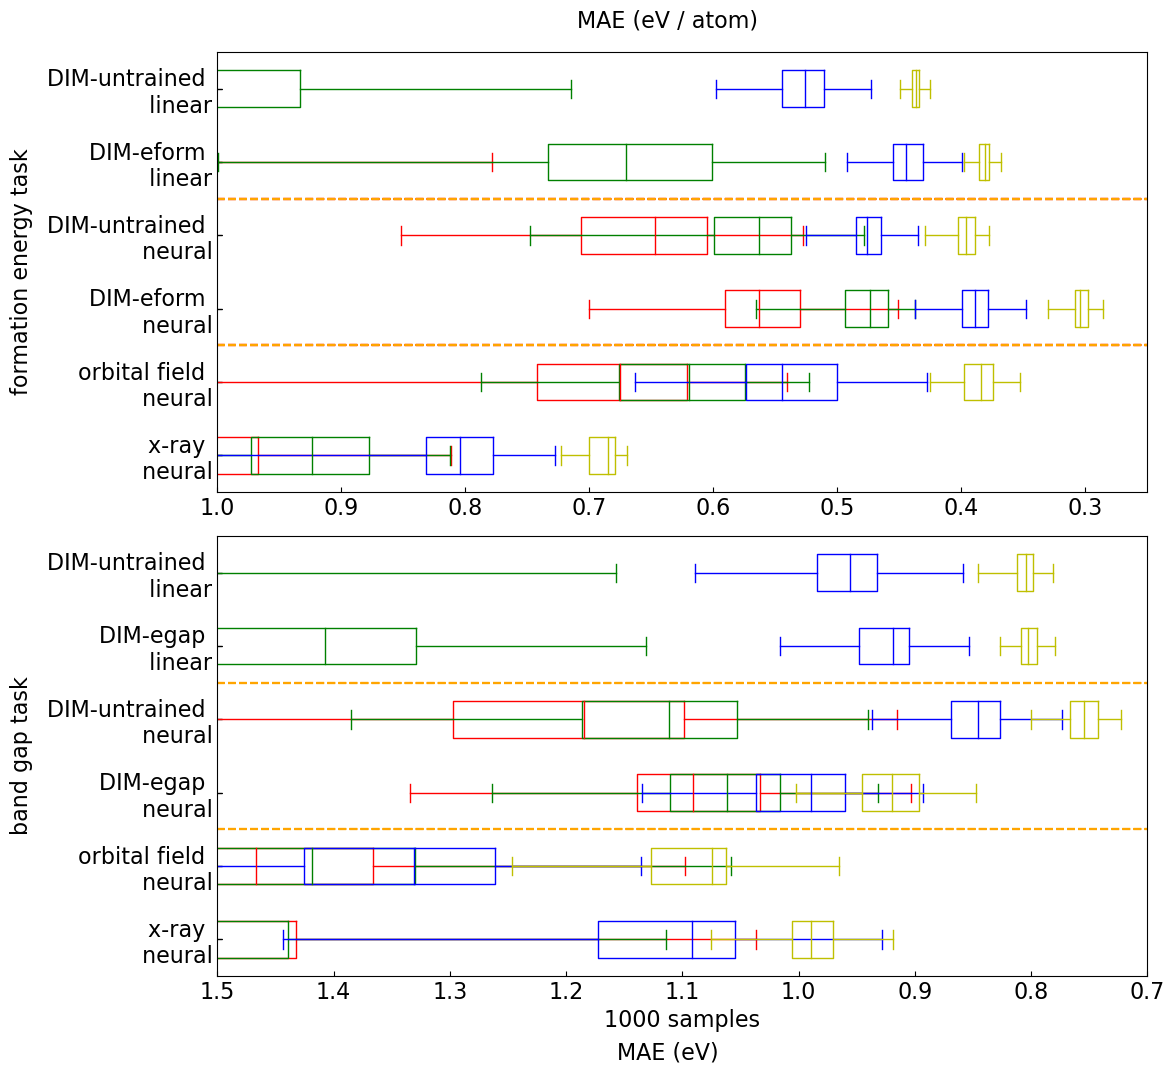

In [16]:
#normalizing kills my performance
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib
import numpy as np

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

RepMAE = pd.read_csv("Downstream_DIM.csv")
eformorbitalMAE = pd.read_csv("featurizer_pickles/eformorbital_Downstream_Featurized.csv")
eformjarvisMAE = pd.read_csv("featurizer_pickles copy/eformjarvis_Downstream_Featurized.csv")
eformxrayMAE =  pd.read_csv("featurizer_pickles/eformxray_Downstream_Featurized.csv")
print(RepMAE["model"].unique())

fig,ax = plt.subplots(2, 1, sharex=False, sharey="row",gridspec_kw={'wspace':0.1, 'hspace':0.1},figsize=(12,12))
fig.text(0.5, 0.90, "MAE (eV / atom)", ha='center')

ax_i = 0
ax[0].set_ylabel("formation energy task",labelpad=10)
colors = ["r","g","b","y"]
for color,limit,name,xlim in zip(colors,[50,100,250,1000],["eformorbital_replearn_10.png","eformorbital_replearn_50.png","eformorbital_replearn_100.png","eformorbital_replearn_250.png","eformorbital_replearn_1000.png","eformorbital_replearn_10000.png"],[[1.5,0.4],[1,0.4],[0.9,0.3],[0.8,0.28]]):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_eform")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_eform")]
    vectors3 = eformorbitalMAE[(eformorbitalMAE["limit"] == limit) & (eformorbitalMAE["model"] == "eform_orbital")]
    vectors4 = eformjarvisMAE[(eformjarvisMAE["limit"] == limit) & (eformjarvisMAE["model"] == "eform_jarvis")]
    vectors5 = eformxrayMAE[(eformxrayMAE["limit"] == limit) & (eformxrayMAE["model"] == "eform_xray")]

    xmin = np.min(np.array([np.min(vectors1["nn_MAE"]),np.min(vectors2["nn_MAE"]),np.min(vectors3["nn_MAE"]),np.min(vectors5["nn_MAE"])]))
    xmax = np.max(np.array([np.max(vectors1["nn_MAE"]),np.max(vectors2["nn_MAE"]),np.max(vectors3["nn_MAE"]),np.max(vectors5["nn_MAE"])]))
    print(xmin,xmax)
    xbuffer = (xmax-xmin)*0.05

    if ax_i == 0:
        box = ax[0].boxplot([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],labels=["DIM-untrained \n linear","DIM-eform \n linear","DIM-untrained \n neural","DIM-eform \n neural","orbital field \n neural","x-ray \n neural"],widths=0.5,vert=False,whis=100000000)
    else:
        box = ax[0].boxplot([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],labels=["","","","","",""],widths=0.5,vert=False,whis=100000000)
    for _,line_list in box.items():
            for line in line_list:
                line.set_color(color)
    [ax[0].axhline(y, color = 'r', linestyle='--') for y in [2.5,4.5]]
    ax[0].set_ylim(6.5,0.5)
    ax[0].set_xlim(1,0.25)

    ax_i += 1

    fig.savefig("figure_eform_representation.png")
    fig.show()

RepMAE = pd.read_csv("Downstream_DIM.csv")
egaporbitalMAE = pd.read_csv("featurizer_pickles/egaporbital_Downstream_Featurized.csv")
egapjarvisMAE = pd.read_csv("featurizer_pickles copy/egapjarvis_Downstream_Featurized.csv")
egapxrayMAE =  pd.read_csv("featurizer_pickles/egapxray_Downstream_Featurized.csv")
print(RepMAE["model"].unique())

fig.text(0.5, 0.04, "MAE (eV)", ha='center')

ax_i = 0
ax[1].set_ylabel("band gap task",labelpad=10)
colors = ["r","g","b","y"]
for color,limit,name,xlim  in zip(colors,[50,100,250,1000],["egaporbital_replearn_10.png","egaporbital_replearn_50.png","egaporbital_replearn_100.png","egaporbital_replearn_250.png","egaporbital_replearn_1000.png","egaporbital_replearn_10000.png"],[[3.2,0.7],[2.5,0.8],[1.6,0.7],[1.3,0.7]]):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_egap")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_egap")]
    vectors3 = egaporbitalMAE[(eformorbitalMAE["limit"] == limit) & (egaporbitalMAE["model"] == "egap_orbital")]
    vectors4 = egapjarvisMAE[(eformjarvisMAE["limit"] == limit) & (egapjarvisMAE["model"] == "egap_jarvis")]
    vectors5 = egapxrayMAE[(eformxrayMAE["limit"] == limit) & (egapxrayMAE["model"] == "egap_xray")]

    xmin = np.min(np.array([np.min(vectors1["nn_MAE"]),np.min(vectors2["nn_MAE"]),np.min(vectors3["nn_MAE"]),np.min(vectors5["nn_MAE"])]))
    xmax = np.max(np.array([np.max(vectors1["nn_MAE"]),np.max(vectors2["nn_MAE"]),np.max(vectors3["nn_MAE"]),np.max(vectors5["nn_MAE"])]))
    xbuffer = (xmax-xmin)*0.05

    if ax_i == 0:
        box = ax[1].boxplot([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],labels=["DIM-untrained \n linear","DIM-egap \n linear","DIM-untrained \n neural","DIM-egap \n neural","orbital field \n neural","x-ray \n neural"],widths=0.5,vert=False,whis=100000000)
    else:
        box = ax[1].boxplot([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],labels=["","","","","",""],widths=0.5,vert=False,whis=100000000)
    for _,line_list in box.items():
            for line in line_list:
                line.set_color(color)
    [ax[0].axhline(y, color = 'orange', linestyle='--') for y in [2.5,4.5]]
    [ax[1].axhline(y, color = 'orange', linestyle='--') for y in [2.5,4.5]]
    ax[1].set_ylim(6.5,0.5)
    ax[1].set_xlim(1.5,0.7)
    ax[1].set_xlabel(str(limit) + " samples")

    ax_i += 1

    fig.savefig("figure_representation.png",bbox_inches="tight")
    fig.show()

['Initial_eform' 'nocomp_klnorm_moremultiloss_eform' 'Initial_egap'
 'nocomp_klnorm_moremultiloss_egap']
['Initial_eform' 'nocomp_klnorm_moremultiloss_eform' 'Initial_egap'
 'nocomp_klnorm_moremultiloss_egap']


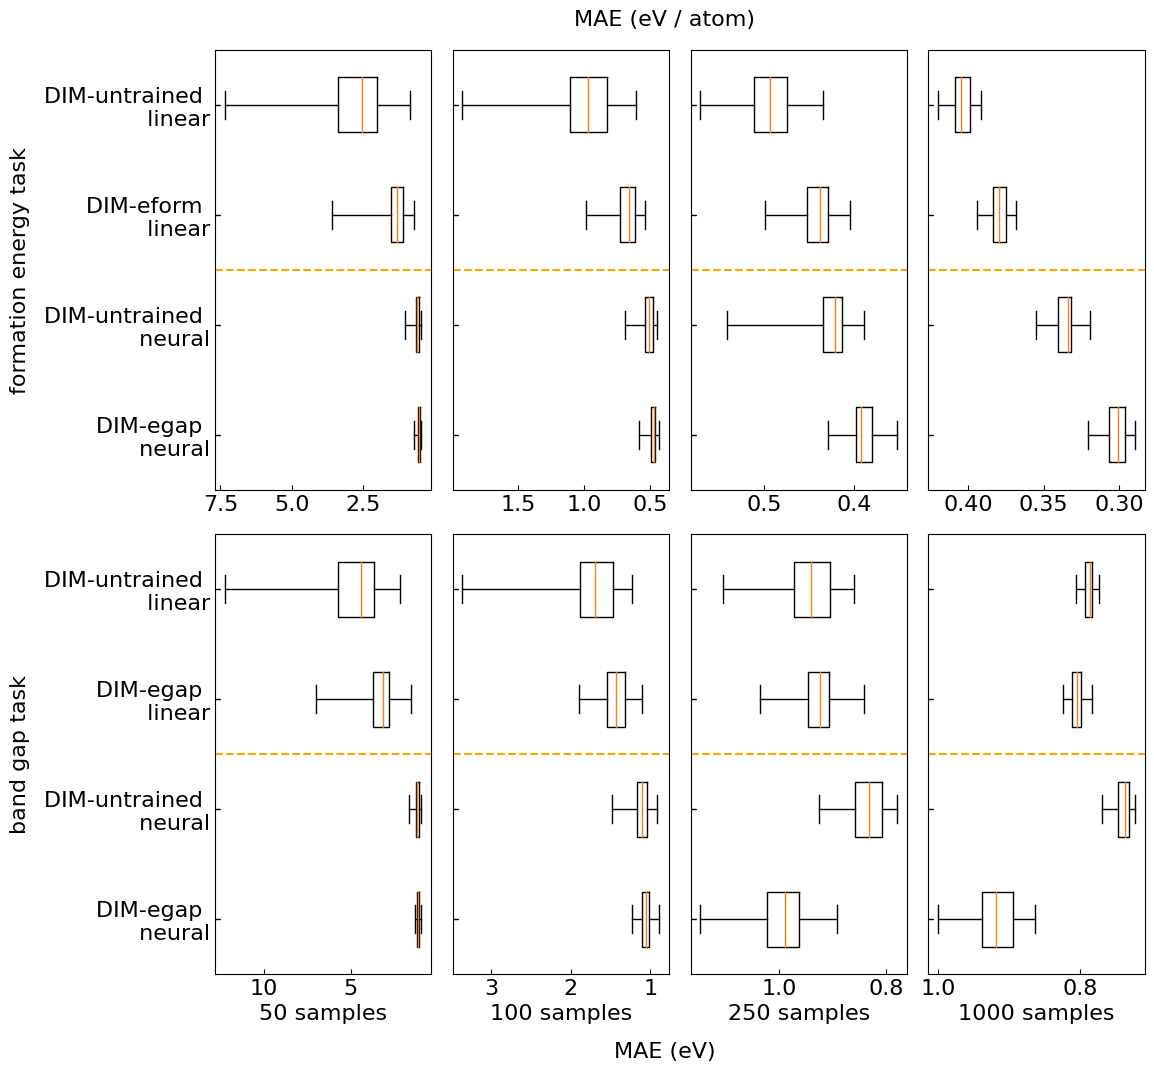

In [ ]:
#normalizing kills my performance
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib
import numpy as np

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

RepMAE = pd.read_csv("Downstream_DIM.csv")
eformorbitalMAE = pd.read_csv("featurizer_pickles/eformorbital_Downstream_Featurized.csv")
eformjarvisMAE = pd.read_csv("featurizer_pickles copy/eformjarvis_Downstream_Featurized.csv")
eformxrayMAE =  pd.read_csv("featurizer_pickles/eformxray_Downstream_Featurized.csv")
print(RepMAE["model"].unique())

fig,ax = plt.subplots(2, 4, sharex=False, sharey="row",gridspec_kw={'wspace':0.1, 'hspace':0.1},figsize=(12,12))
fig.text(0.5, 0.90, "MAE (eV / atom)", ha='center')

ax_i = 0
ax[0][0].set_ylabel("formation energy task",labelpad=10)

for limit,name,xlim in zip([50,100,250,1000],["eformorbital_replearn_10.png","eformorbital_replearn_50.png","eformorbital_replearn_100.png","eformorbital_replearn_250.png","eformorbital_replearn_1000.png","eformorbital_replearn_10000.png"],[[1.5,0.4],[1,0.4],[0.65,0.3],[0.45,0.28]]):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_eform")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_eform")]
    vectors3 = eformorbitalMAE[(eformorbitalMAE["limit"] == limit) & (eformorbitalMAE["model"] == "eform_orbital")]
    vectors4 = eformjarvisMAE[(eformjarvisMAE["limit"] == limit) & (eformjarvisMAE["model"] == "eform_jarvis")]
    vectors5 = eformxrayMAE[(eformxrayMAE["limit"] == limit) & (eformxrayMAE["model"] == "eform_xray")]

    xmin = np.min(np.array([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"]]))
    xmax = np.max(np.array([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"]]))
    xbuffer = (xmax-xmin)*0.05

    if ax_i == 0:
        ax[0][ax_i].boxplot([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"]],labels=["DIM-untrained \n linear","DIM-eform \n linear","DIM-untrained \n neural","DIM-egap \n neural"],widths=0.5,vert=False,whis=100000000)
    else:
        ax[0][ax_i].boxplot([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"]],labels=["","","",""],widths=0.5,vert=False,whis=100000000)
    ax[0][ax_i].set_ylim(4.5,0.5)
    ax[0][ax_i].set_xlim(xmax+xbuffer,xmin-xbuffer)

    ax_i += 1

    fig.savefig("figure_eform_representation.png")
    fig.show()

RepMAE = pd.read_csv("Downstream_DIM.csv")
egaporbitalMAE = pd.read_csv("featurizer_pickles/egaporbital_Downstream_Featurized.csv")
egapjarvisMAE = pd.read_csv("featurizer_pickles copy/egapjarvis_Downstream_Featurized.csv")
egapxrayMAE =  pd.read_csv("featurizer_pickles/egapxray_Downstream_Featurized.csv")
print(RepMAE["model"].unique())

fig.text(0.5, 0.04, "MAE (eV)", ha='center')

ax_i = 0
ax[1][0].set_ylabel("band gap task",labelpad=10)
for limit,name,xlim  in zip([50,100,250,1000],["egaporbital_replearn_10.png","egaporbital_replearn_50.png","egaporbital_replearn_100.png","egaporbital_replearn_250.png","egaporbital_replearn_1000.png","egaporbital_replearn_10000.png"],[[8,0.7],[4,0.8],[1.2,0.75],[1.3,0.65]]):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_egap")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_egap")]
    vectors3 = egaporbitalMAE[(eformorbitalMAE["limit"] == limit) & (egaporbitalMAE["model"] == "egap_orbital")]
    vectors4 = egapjarvisMAE[(eformjarvisMAE["limit"] == limit) & (egapjarvisMAE["model"] == "egap_jarvis")]
    vectors5 = egapxrayMAE[(eformxrayMAE["limit"] == limit) & (egapxrayMAE["model"] == "egap_xray")]

    xmin = np.min(np.array([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"]]))
    xmax = np.max(np.array([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"]]))
    xbuffer = (xmax-xmin)*0.05

    if ax_i == 0:
        ax[1][ax_i].boxplot([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"]],labels=["DIM-untrained \n linear","DIM-egap \n linear","DIM-untrained \n neural","DIM-egap \n neural"],widths=0.5,vert=False,whis=100000000)
    else:
        ax[1][ax_i].boxplot([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"]],labels=["","","",""],widths=0.5,vert=False,whis=100000000)
    [ax[0][ax_i].axhline(y, color = 'orange', linestyle='--') for y in [2.5]]
    [ax[1][ax_i].axhline(y, color = 'orange', linestyle='--') for y in [2.5]]
    ax[1][ax_i].set_ylim(4.5,0.5)
    ax[1][ax_i].set_xlim(xmax+xbuffer,xmin-xbuffer)
    ax[1][ax_i].set_xlabel(str(limit) + " samples")

    ax_i += 1

    fig.savefig("figure_representation_linear.png",bbox_inches="tight")
    fig.show()



['Initial_eform' 'nocomp_klnorm_moremultiloss_eform' 'Initial_egap'
 'nocomp_klnorm_moremultiloss_egap']
['Initial_eform' 'nocomp_klnorm_moremultiloss_eform' 'Initial_egap'
 'nocomp_klnorm_moremultiloss_egap']


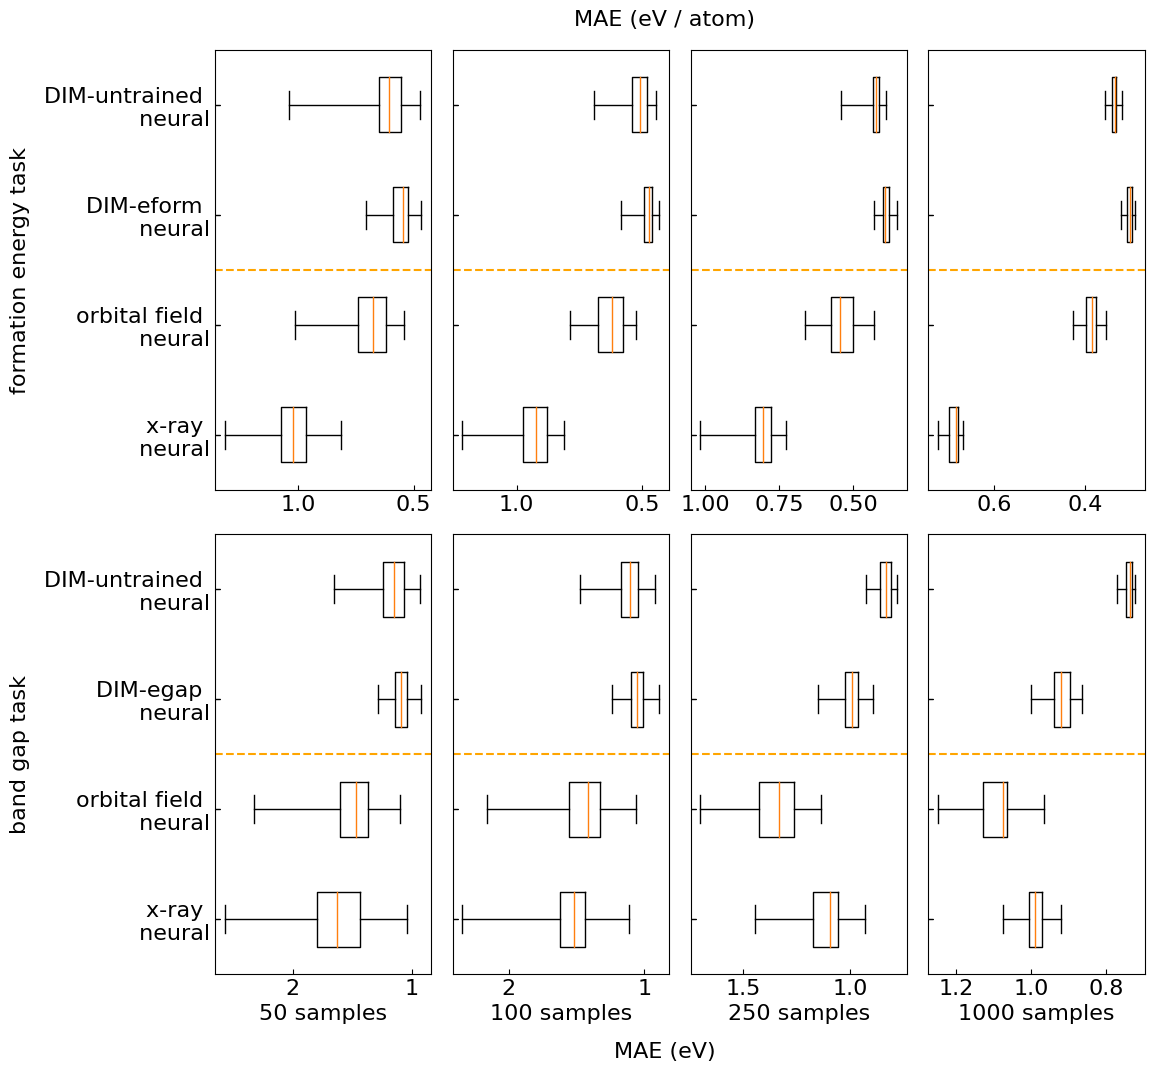

In [ ]:
#normalizing kills my performance
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib
import numpy as np

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

RepMAE = pd.read_csv("Downstream_DIM.csv")
eformorbitalMAE = pd.read_csv("featurizer_pickles/eformorbital_Downstream_Featurized.csv")
eformjarvisMAE = pd.read_csv("featurizer_pickles copy/eformjarvis_Downstream_Featurized.csv")
eformxrayMAE =  pd.read_csv("featurizer_pickles/eformxray_Downstream_Featurized.csv")
print(RepMAE["model"].unique())

fig,ax = plt.subplots(2, 4, sharex=False, sharey="row",gridspec_kw={'wspace':0.1, 'hspace':0.1},figsize=(12,12))
fig.text(0.5, 0.90, "MAE (eV / atom)", ha='center')

ax_i = 0
ax[0][0].set_ylabel("formation energy task",labelpad=10)

for limit,name,xlim in zip([50,100,250,1000],["eformorbital_replearn_10.png","eformorbital_replearn_50.png","eformorbital_replearn_100.png","eformorbital_replearn_250.png","eformorbital_replearn_1000.png","eformorbital_replearn_10000.png"],[[1.45,0.4],[1.3,0.4],[1.1,0.3],[0.8,0.28]]):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_eform")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_eform")]
    vectors3 = eformorbitalMAE[(eformorbitalMAE["limit"] == limit) & (eformorbitalMAE["model"] == "eform_orbital")]
    vectors4 = eformjarvisMAE[(eformjarvisMAE["limit"] == limit) & (eformjarvisMAE["model"] == "eform_jarvis")]
    vectors5 = eformxrayMAE[(eformxrayMAE["limit"] == limit) & (eformxrayMAE["model"] == "eform_xray")]

    xmin = np.min(np.array([vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]]))
    xmax = np.max(np.array([vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]]))
    xbuffer = (xmax-xmin)*0.05

    if ax_i == 0:
        ax[0][ax_i].boxplot([vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],labels=["DIM-untrained \n neural","DIM-eform \n neural","orbital field \n neural","x-ray \n neural"],widths=0.5,vert=False,whis=100000000)
    else:
        ax[0][ax_i].boxplot([vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],labels=["","","",""],widths=0.5,vert=False,whis=100000000)
    ax[0][ax_i].set_ylim(4.5,0.5)
    ax[0][ax_i].set_xlim(xmax+xbuffer,xmin-xbuffer)

    ax_i += 1

    fig.savefig("figure_eform_representation.png")
    fig.show()

RepMAE = pd.read_csv("Downstream_DIM.csv")
egaporbitalMAE = pd.read_csv("featurizer_pickles/egaporbital_Downstream_Featurized.csv")
egapjarvisMAE = pd.read_csv("featurizer_pickles copy/egapjarvis_Downstream_Featurized.csv")
egapxrayMAE =  pd.read_csv("featurizer_pickles/egapxray_Downstream_Featurized.csv")
print(RepMAE["model"].unique())

fig.text(0.5, 0.04, "MAE (eV)", ha='center')

ax_i = 0
ax[1][0].set_ylabel("band gap task",labelpad=10)
for limit,name,xlim  in zip([50,100,250,1000],["egaporbital_replearn_10.png","egaporbital_replearn_50.png","egaporbital_replearn_100.png","egaporbital_replearn_250.png","egaporbital_replearn_1000.png","egaporbital_replearn_10000.png"],[[2.8,0.7],[2.5,0.8],[1.8,0.7],[1.3,0.7]]):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_egap")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_egap")]
    vectors3 = egaporbitalMAE[(eformorbitalMAE["limit"] == limit) & (egaporbitalMAE["model"] == "egap_orbital")]
    vectors4 = egapjarvisMAE[(eformjarvisMAE["limit"] == limit) & (egapjarvisMAE["model"] == "egap_jarvis")]
    vectors5 = egapxrayMAE[(eformxrayMAE["limit"] == limit) & (egapxrayMAE["model"] == "egap_xray")]

    xmin = np.min(np.array([vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]]))
    xmax = np.max(np.array([vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]]))
    xbuffer = (xmax-xmin)*0.05

    if ax_i == 0:
        ax[1][ax_i].boxplot([vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],labels=["DIM-untrained \n neural","DIM-egap \n neural","orbital field \n neural","x-ray \n neural"],widths=0.5,vert=False,whis=100000000)
    else:
        ax[1][ax_i].boxplot([vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors5["nn_MAE"]],labels=["","","",""],widths=0.5,vert=False,whis=100000000)
    [ax[0][ax_i].axhline(y, color = 'orange', linestyle='--') for y in [2.5]]
    [ax[1][ax_i].axhline(y, color = 'orange', linestyle='--') for y in [2.5]]
    ax[1][ax_i].set_ylim(4.5,0.5)
    ax[1][ax_i].set_xlim(xmax+xbuffer,xmin-xbuffer)
    ax[1][ax_i].set_xlabel(str(limit) + " samples")

    ax_i += 1

    fig.savefig("figure_representation_matminer.png",bbox_inches="tight")
    fig.show()

